<a href="https://colab.research.google.com/github/Amer447771kkk/online_education/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import pandas as pd
url = 'https://github.com/kennedykwangari/Time-Series-Analysis-and-Forecasting-with-Python/blob/master/AirPassengers.csv?raw=true'
df = pd.read_csv(url)
pd.set_option('display.max_rows', None)
df


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
print(df.isnull().sum())


Month          0
#Passengers    0
dtype: int64


In [ ]:
print(df.describe())


       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


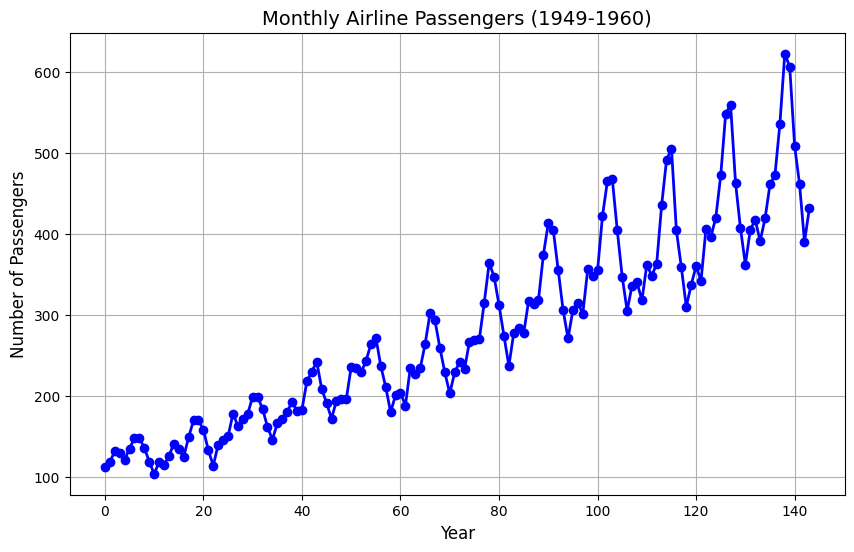

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Monthly Airline Passengers (1949-1960)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['#Passengers'])
print(f"Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
if result[1] < 0.05:
    print("السلسلة الزمنية ثابتة (Stationary).")
else:
    print("السلسلة الزمنية غير ثابتة (Non-Stationary).")


Test Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
السلسلة الزمنية غير ثابتة (Non-Stationary).


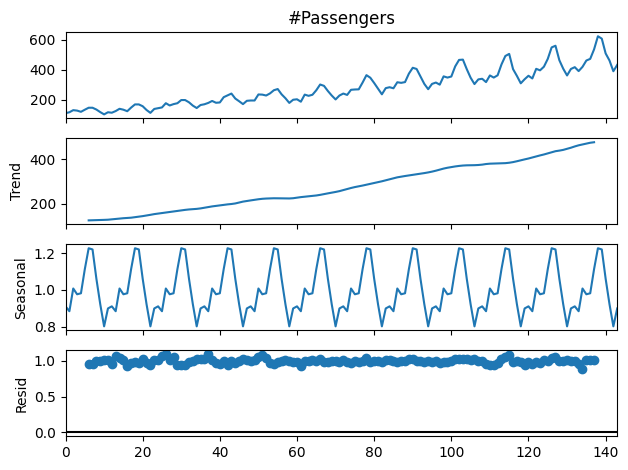

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Fri, 18 Apr 2025   AIC                           1390.135
Time:                        13:59:00   BIC                           1407.912
Sample:                             0   HQIC                          1397.358
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

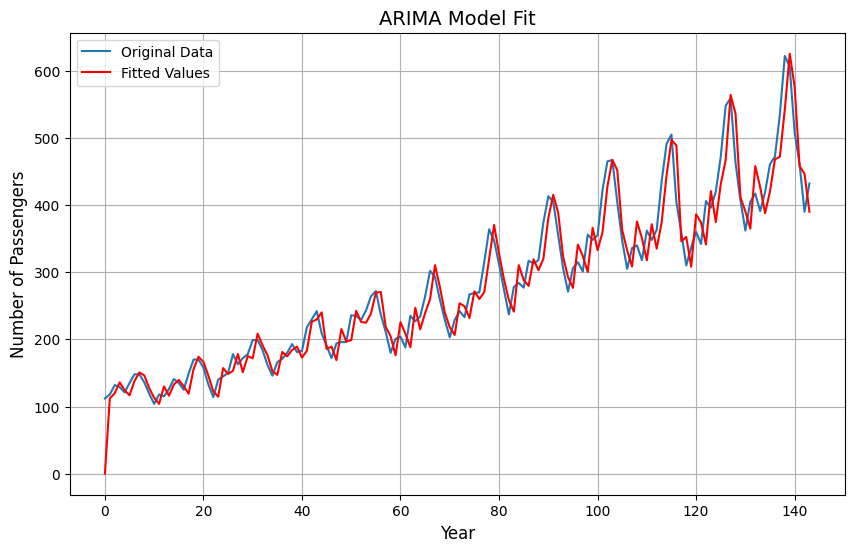

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['#Passengers'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(df.index, model_fit.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model Fit', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-21-3f7f16c2056e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(df.index[-1], periods=13, freq='M')[1:]


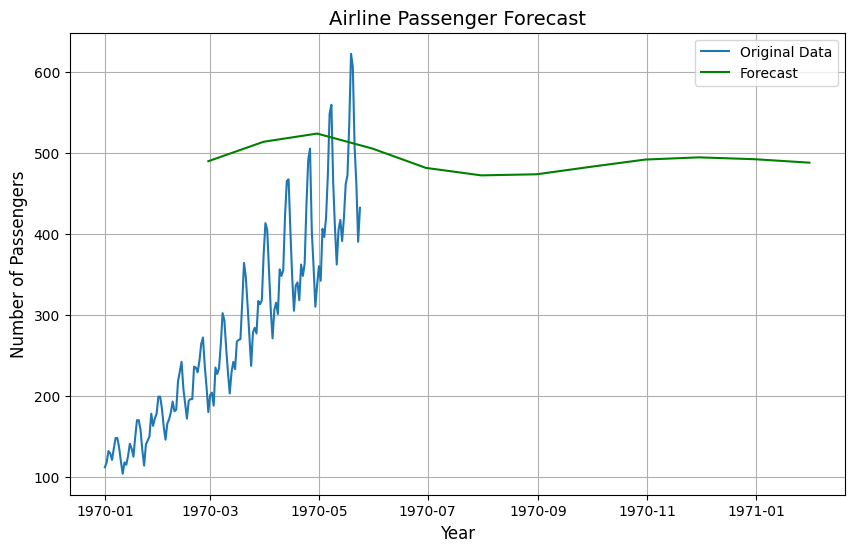

In [ ]:
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(forecast_index, forecast, color='green', label='Forecast')
plt.title('Airline Passenger Forecast', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
